In [1]:
import pandas as pd
df = pd.read_csv("/content/Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
df.shape

(101, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

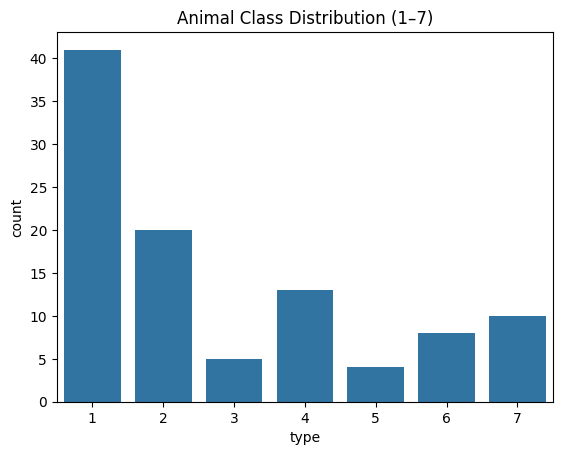

In [11]:
sns.countplot(x=df['type'])
plt.title("Animal Class Distribution (1–7)")
plt.show()


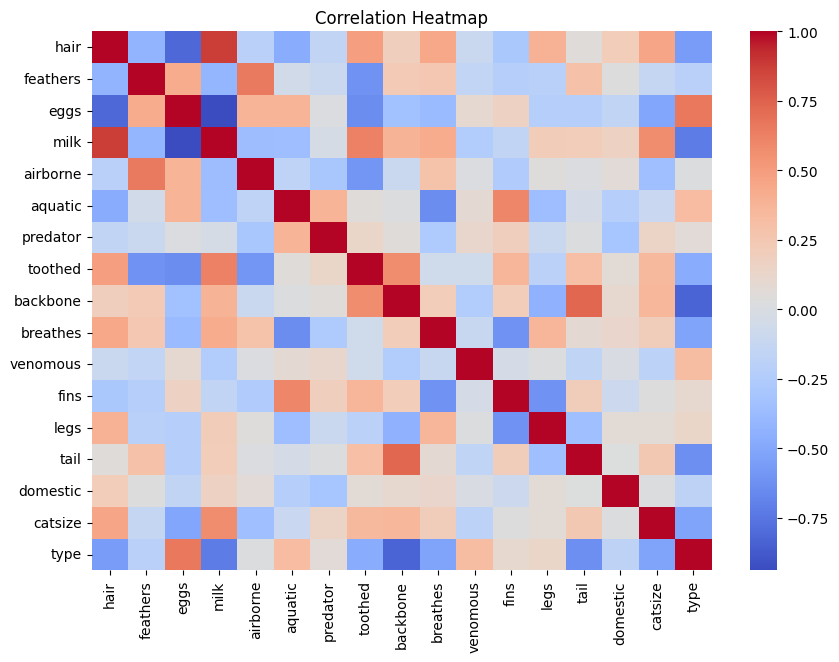

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(['animal name'], axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df.isnull().sum()


,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [16]:
import numpy as np
num_cols = df.drop(['animal name'], axis=1).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9523809523809523
Precision: 0.9166666666666666
Recall: 0.9523809523809523
F1 Score: 0.9319727891156462

Classification Report:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         4
         3.0       0.00      0.00      0.00         1
         4.0       0.75      1.00      0.86         3
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

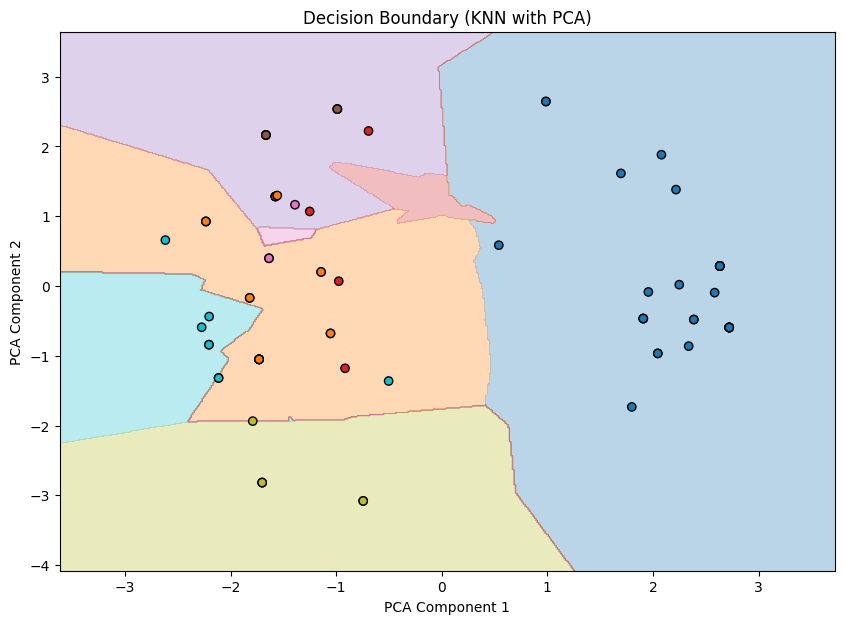

In [23]:
from sklearn.decomposition import PCA
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN on PCA data for visualization
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_pca, y_train)

# Mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                      c=y_train, cmap='tab10', edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary (KNN with PCA)")
plt.show()


# **Interview Question**

## **1. What are the key hyperparameters in KNN? **

The key hyperparameters in KNN are:

1. n_neighbors (K value)

It specifies how many nearest neighbors are used to classify a new data point.

A small K may cause overfitting, while a large K may oversmooth and cause underfitting.

2. metric (Distance Measure)

Defines how the distance between points is calculated.

Examples: Euclidean, Manhattan, Minkowski, Chebyshev.

3. weights

Determines how each neighbor contributes to the final prediction.

uniform: all neighbors have equal weight.

distance: closer neighbors influence more.

4. p (for Minkowski distance)

Controls the type of distance in Minkowski metric.

p = 1 → Manhattan distance

p = 2 → Euclidean distance (most common)

5. algorithm

Specifies how nearest neighbors are searched.

Options: auto, brute, kd_tree, ball_tree.

Affects computation efficiency, especially for large datasets.

6. leaf_size

Used when KD-tree or Ball-tree algorithms are chosen.

Influences the speed and memory usage, not model accuracy.

**2. What distance metrics can be used in KNN? **

KNN can use different distance metrics depending on the data type:

1. Euclidean Distance

The most commonly used metric.

Measures straight-line distance.

Best for continuous numeric features.

2. Manhattan Distance

Sum of absolute differences between points.

Useful in high-dimensional spaces or grid-like data.

3. Minkowski Distance

A generalized distance metric.

Includes both Euclidean (p=2) and Manhattan (p=1) as special cases.

4. Chebyshev Distance

Measures the maximum absolute difference between any dimension.

Useful in certain geometric or tolerance-based applications.

5. Cosine Distance

Measures the angle between vectors.

Common in text analysis and high-dimensional sparse data.

6. Hamming Distance

Measures the number of positions at which values differ.

Suitable for binary or categorical data.